In [11]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
X, y = make_blobs(centers=2, random_state=0)

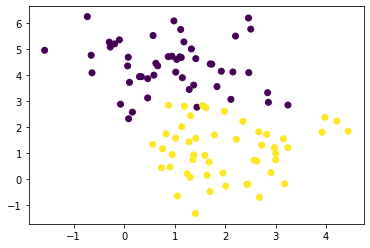

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [14]:
class CustomLogisticRegression:
    
    def __init__(self, lr=0.01, iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self, X, y):
        
        self.__y = y.reshape(-1, 1)
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        self.__X = X_mod
        
        self.__theta = np.zeros([X_mod.shape[1], 1])
        
        err = []
        for i in range(self.__iters):
            err.append(self.error())
            self.gradient_accend()
            
        self.theta_ = self.__theta 
            
        return err
        
    def gradient_accend(self):
        delta_theta = self.gradient()
#         print(delta_theta.shape) # (3,1)
        self.__theta -= delta_theta
        
    def gradient(self):
        yh = self.hypothesis(self.__X)
#         print(yh.shape) # (100, 1)
        ya = self.__y
        diff = -(ya - yh) # (100, 1) # here i have taken -ve of log likelyhood, hence gradiet descent            
        return np.dot(self.__X.T, diff) * self.__lr # (3,1) # for every feature, sum(diff * ith example)
        
    def hypothesis(self, X):
        prod = np.dot(X, self.__theta)
#         print(X.shape) # (100,3)        
#         print(self.__theta.shape) # (3,1)
#         print(prod.shape) # (100,1)
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya*np.log(yh) + (1-ya)*np.log(1-yh)
#         print(ll.shape) # (100, 1)
        return -np.mean(ll)
    
    def predict(self, X):
        X_mod = np.hstack([np.ones([len(X), 1]), X])
        yh = self.hypothesis(X_mod)
        
        return (yh > .5).astype(int).flatten()
    
    def score(self, X, y):
        yp = self.predict(X)
        return np.mean(yp == y)
    
    def confusion_matrix(self, X, y):
        yp = self.predict(X)
        
        tp = np.mean((y==1) & (yp==1))
        tn = np.mean((y==0) & (yp==0))
        fp = np.mean((y==0) & (yp==1))
        fn = np.mean((y==1) & (yp==0))
        
        return np.array([[tp, fp], [fn, tn]])
        
        

In [15]:
model = CustomLogisticRegression()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [17]:
err = model.fit(X_train, y_train)

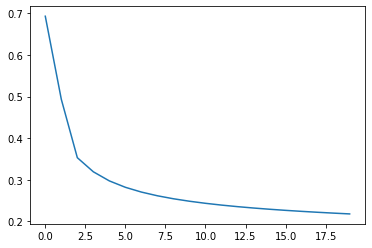

In [18]:
plt.plot(err)

In [19]:
model.theta_

array([[ 0.71194608],
       [ 1.17525229],
       [-1.1967875 ]])

In [20]:
model.score(X_test, y_test)

0.8787878787878788